In [ ]:
##Test

In [1]:
#Import Libraries
import requests
import json
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [3]:
#Pull factors and BTC price from Glassnode Api
API_KEY = "1rwUpyBLJnEo1qGTFlLuz1CgeTx"
vol = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_sum',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
vol_df = pd.read_json(vol.text, convert_dates=['t'])

dorm = requests.get('https://api.glassnode.com/v1/metrics/indicators/average_dormancy',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
dormancy_df = pd.read_json(dorm.text, convert_dates=['t'])

# make API request
asopr = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr_adjusted',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
asopr_df = pd.read_json(asopr.text, convert_dates=['t'])
asopr_df.head()

# make API request
price_res = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_close',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
price_df = pd.read_json(price_res.text, convert_dates=['t'])

# make API request
exch_flow = requests.get('https://api.glassnode.com/v1/metrics/transactions/transfers_volume_exchanges_net',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
exch_df = pd.read_json(exch_flow.text, convert_dates=['t'])

# make API request
cdd = requests.get('https://api.glassnode.com/v1/metrics/indicators/cdd',
    params={'a': 'BTC', 'api_key': API_KEY})

# convert to pandas dataframe
cdd_df = pd.read_json(cdd.text, convert_dates=['t'])



In [4]:
vol_df.rename(columns = {'t':'date', 'v':'vol'}, inplace=True)
vol_df.set_index('date', inplace=True)


In [5]:
dormancy_df.rename(columns = {'t':'date', 'v':'dormancy'}, inplace=True)
dormancy_df.set_index('date', inplace=True)


In [6]:
asopr_df.rename(columns = {'t':'date', 'v':'asopr'}, inplace=True)
asopr_df.set_index('date', inplace=True)

In [7]:
price_df.rename(columns = {'t':'date', 'v':'price'}, inplace=True)
price_df.set_index('date', inplace=True)

In [8]:
exch_df.rename(columns = {'t':'date', 'v':'flow'}, inplace=True)
exch_df.set_index('date', inplace=True)

In [9]:
cdd_df.rename(columns = {'t':'date', 'v':'cdd'}, inplace=True)
cdd_df.set_index('date', inplace=True)

In [10]:
dataset = pd.concat([vol_df, dormancy_df, asopr_df, price_df, exch_df, cdd_df], axis=1, join='inner')

In [11]:
dataset.dropna(inplace=True)

In [12]:
dataset.shape

(3554, 6)

In [13]:
data_new = dataset['2015-01-01':]
data_new

,vol,dormancy,asopr,price,flow,cdd
date,,,,,,
2015-01-01,4.646205e+05,2.302504,0.987951,314.025456,124.391488,9.468414e+05
2015-01-02,7.280903e+05,2.879840,0.978582,315.687161,790.763344,1.942400e+06
2015-01-03,8.367299e+05,6.160422,0.923681,283.006535,4634.540821,4.768928e+06
2015-01-04,1.129690e+06,6.023914,0.915979,263.807883,-897.057854,5.944678e+06
2015-01-05,1.134569e+06,4.854263,0.901450,276.800000,7898.518534,5.045935e+06
...,...,...,...,...,...,...
2021-05-05,1.828384e+06,14.185823,1.039156,57424.005948,-1915.978397,8.965035e+06
2021-05-06,1.808012e+06,14.409470,1.047412,56485.701297,-71.688909,8.048288e+06
2021-05-07,1.939428e+06,32.867983,1.105494,57369.557999,-9524.841477,2.461146e+07


In [14]:
dataset

,vol,dormancy,asopr,price,flow,cdd
date,,,,,,
2011-08-17,3.230502e+05,2.860031,1.023796,10.993067,0.007500,9.222607e+05
2011-08-18,4.002768e+05,3.039587,1.018691,10.847018,8.049029,1.214820e+06
2011-08-19,5.561058e+05,1.548021,1.009232,11.650000,39.591418,8.595439e+05
2011-08-20,2.246163e+05,3.934542,1.026221,11.450998,-8.048029,8.800028e+05
2011-08-21,2.428926e+05,1.686685,0.993798,11.323212,1.819000,4.080212e+05
...,...,...,...,...,...,...
2021-05-05,1.828384e+06,14.185823,1.039156,57424.005948,-1915.978397,8.965035e+06
2021-05-06,1.808012e+06,14.409470,1.047412,56485.701297,-71.688909,8.048288e+06
2021-05-07,1.939428e+06,32.867983,1.105494,57369.557999,-9524.841477,2.461146e+07


In [15]:
# dataset['diff'] = dataset['price'].pct_change()
# dataset.drop(columns='price', inplace=True)
# dataset.dropna(inplace=True)
# dataset

In [16]:
def window_data(df, window, target_column):
    Xdf = df
    ydf = df[target_column]
    X, y = [], []
    for i in range(len(Xdf)-window):
        features = Xdf[i:i+window]
        X.append(features)
    for i in range(len(ydf)-window):
        target = ydf[i+window]
        y.append(target)
    return np.array(X), np.array(y).reshape(-1,1)
    
    
    

In [127]:
X, y = window_data(data_new, 20, "price")

In [128]:
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [129]:
scalers = {}
for i in range(X_train.shape[1]):
    scalers[i] = MinMaxScaler()
    X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 
for i in range(X_test.shape[1]):
    X_test[:, i, :] = scalers[i].transform(X_test[:, i, :])

In [130]:
X_test.shape

(460, 20, 6)

In [131]:
sc = MinMaxScaler()
sc.fit(y)
y_train = sc.transform(y_train)
y_test = sc.transform(y_test)

In [141]:
#LSTM model
model = Sequential()
epochs = 10
model.add(GRU(100, return_sequences=True, input_shape=(X_train.shape[1],6)))
model.add(Dropout(0.2))
model.add(GRU(64))
model.add(Dropout(0.1))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
fit = model.fit(X_train, y_train, batch_size=1, epochs = epochs)

Epoch 1/10
1840/1840 [==============================] - 12s 5ms/step - loss: 0.0017
Epoch 2/10
1840/1840 [==============================] - 10s 5ms/step - loss: 4.0933e-04
Epoch 3/10
1840/1840 [==============================] - 10s 5ms/step - loss: 3.0380e-04
Epoch 4/10
1840/1840 [==============================] - 10s 5ms/step - loss: 1.8309e-04
Epoch 5/10
1840/1840 [==============================] - 10s 5ms/step - loss: 1.8264e-04
Epoch 6/10
1840/1840 [==============================] - 8s 4ms/step - loss: 3.1381e-04
Epoch 7/10
1840/1840 [==============================] - 8s 4ms/step - loss: 2.3472e-04
Epoch 8/10
1840/1840 [==============================] - 8s 4ms/step - loss: 2.0668e-04
Epoch 9/10
1840/1840 [==============================] - 8s 4ms/step - loss: 1.5379e-04
Epoch 10/10
1840/1840 [==============================] - 8s 4ms/step - loss: 2.4653e-04


In [17]:
model.summary()

NameError: name 'model' is not defined

<AxesSubplot:>

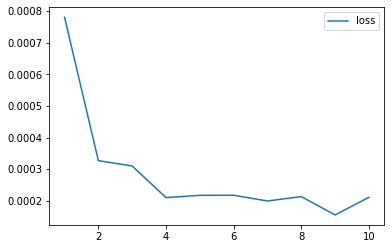

In [143]:
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(fit.history, index=range(1, len(fit.history["loss"]) + 1))

# Plot the loss
df_plot.plot(y="loss")

In [144]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 3ms/step - loss: 0.0398


0.03979344293475151

In [145]:
predicted = model.predict(X_test)
predicted.shape

(460, 1)

In [146]:
mse = mean_squared_error(y_test, predicted)
mse

0.03979344147309956

In [147]:
np.sqrt(mse)

0.19948293529297076

In [148]:
predicted_prices = sc.inverse_transform(predicted)
real_prices = sc.inverse_transform(y_test.reshape(-1, 1))

<AxesSubplot:xlabel='date'>

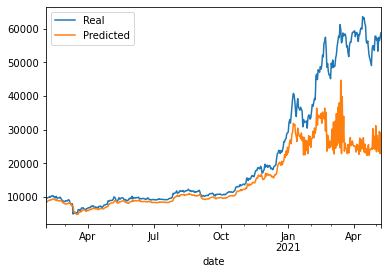

In [149]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = data_new.index[-len(real_prices): ])
stocks.plot()